In [14]:
import os
import csv
from matplotlib import rc
import matplotlib.pyplot as plt

In [15]:
ansatz_str = 'UCCSD_no_initial_point'
path = f'hydrogen_aer_{ansatz_str}'

In [16]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

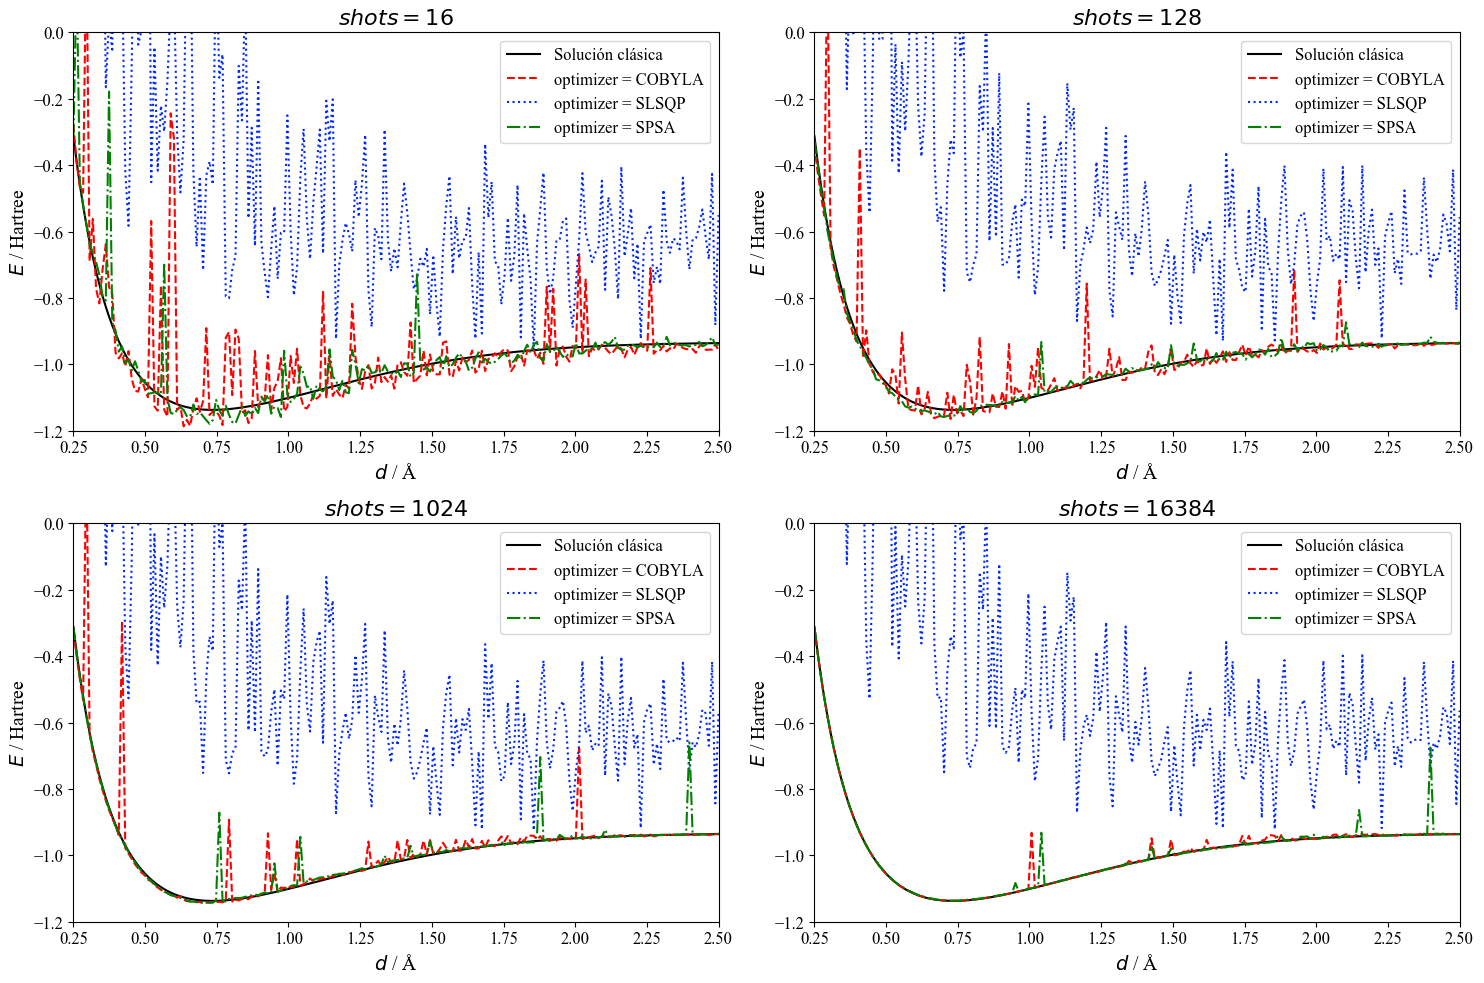

In [17]:
colors = ['red', '#0027FF', 'green']
lines = ['--', ':', '-.']
folders = [folder for folder in os.listdir(path) if '.' not in folder]

rows = 2
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 10))

for n, folder in enumerate(folders):
    files = [file for file in os.listdir(f'{path}/{folder}') if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for i, file in enumerate(files):
        shots = int(file.split('=')[1].split('.')[0])

        distance  = []
        energy = []
        energy_vqe = []

        with open(f'{path}/{folder}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                distance.append(float(row[0]))
                energy.append(float(row[1]))
                energy_vqe.append(float(row[2]))


        row = i // columns
        column = i % columns

        if n == 0:
            axs[row, column].plot(distance, energy, color='black', marker='', linestyle='-', label='Solución clásica')

        axs[row, column].plot(distance, energy_vqe, color=colors[n], marker='', linestyle=lines[n], label=f'optimizer = {folder.split('_')[1]}')
        axs[row, column].set_title(f'$shots = {shots}$', fontsize=16)
        axs[row, column].set_xlabel('$d$ / Å', fontsize=14)
        axs[row, column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[row, column].grid(False)
        axs[row, column].set_xlim(0.25, 2.5)
        axs[row, column].set_ylim(-1.2, 0)
        axs[row, column].legend(loc='upper right')
    

plt.tight_layout()
plt.savefig(f'{path}/hydrogen_aer_{ansatz_str}_plot_anexo.png')
plt.savefig(f'../../../TFG/Figuras/hydrogen_aer_{ansatz_str}_plot_anexo.png')
plt.show()

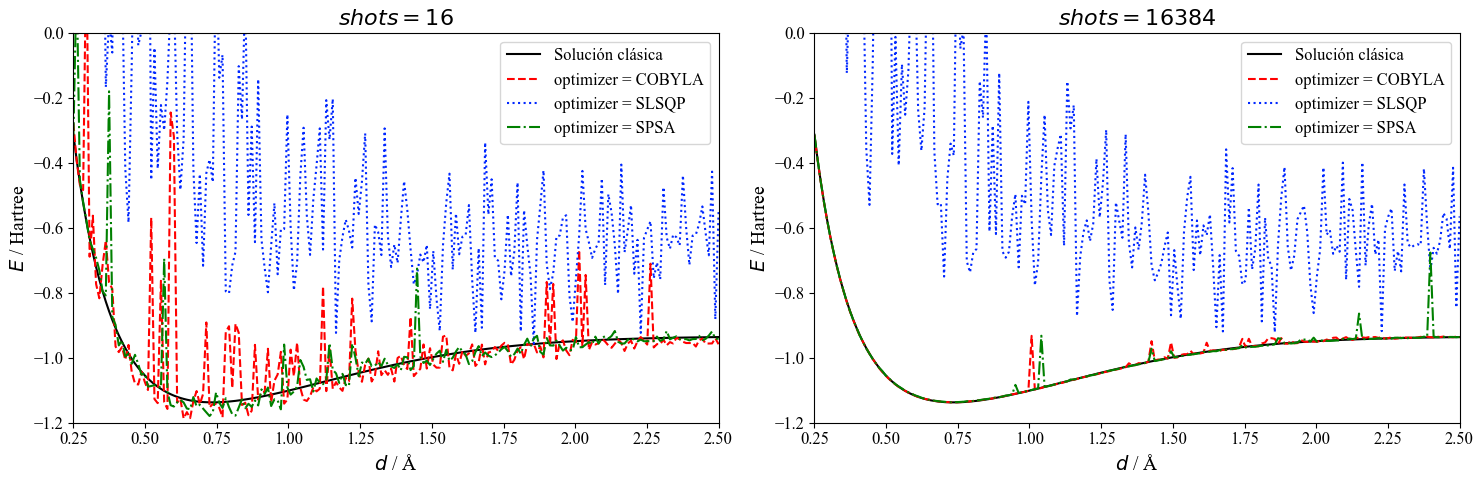

In [18]:
colors = ['red', '#0027FF', 'green']
lines = ['--', ':', '-.']
folders = [folder for folder in os.listdir(path) if '.' not in folder]

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

for n, folder in enumerate(folders):
    files = [file for file in os.listdir(f'{path}/{folder}') if file.endswith('.csv') and ('16' in file or '16384' in files)]
    files = sorted(files, key=ordenar_por_numero)

    for i, file in enumerate(files):
        shots = int(file.split('=')[1].split('.')[0])

        distance  = []
        energy = []
        energy_vqe = []

        with open(f'{path}/{folder}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                distance.append(float(row[0]))
                energy.append(float(row[1]))
                energy_vqe.append(float(row[2]))


        row = i // columns
        column = i % columns

        if n == 0:
            axs[column].plot(distance, energy, color='black', marker='', linestyle='-', label='Solución clásica')

        axs[column].plot(distance, energy_vqe, color=colors[n], marker='', linestyle=lines[n], label=f'optimizer = {folder.split('_')[1]}')
        axs[column].set_title(f'$shots = {shots}$', fontsize=16)
        axs[column].set_xlabel('$d$ / Å', fontsize=14)
        axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].set_xlim(0.25, 2.5)
        axs[column].set_ylim(-1.2, 0)
        axs[column].legend(loc='upper right')
    

plt.tight_layout()
plt.savefig(f'{path}/hydrogen_aer_{ansatz_str}_plot.png')
plt.savefig(f'../../../TFG/Figuras/hydrogen_aer_{ansatz_str}_plot.png')
plt.show()